In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import gensim.downloader as api

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

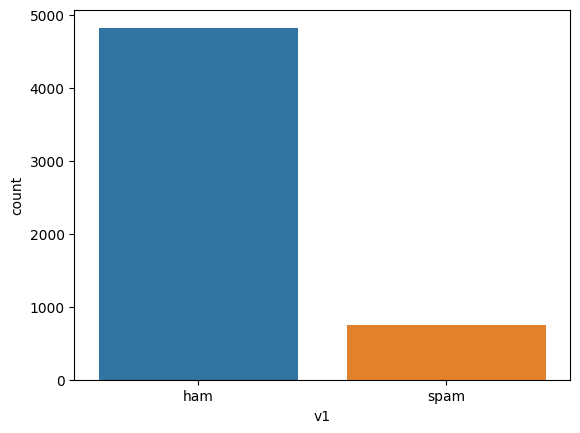

In [ ]:
sns.countplot(x='v1', data=df)
plt.show()

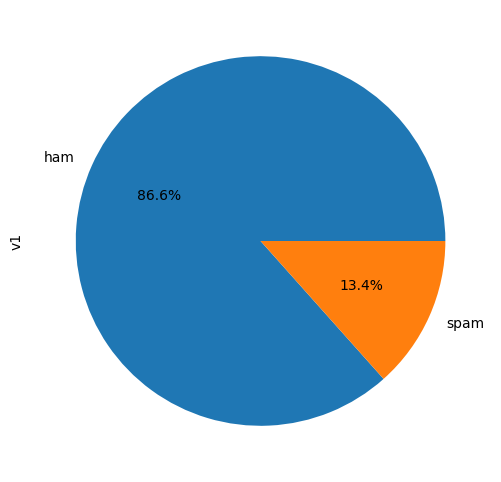

In [ ]:
plt.figure(figsize=(6, 6))
df['v1'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [ ]:
pd.crosstab(df['v1'], df['v2'])

v2,&lt;#&gt; in mca. But not conform.,&lt;#&gt; mins but i had to stop somewhere first.,&lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla,and picking them up from various points,"came to look at the flat, seems ok, in his 50s? * Is away alot wiv work. Got woman coming at 6.30 too.",gonna let me know cos comes bak from holiday that day. is coming. Don't4get2text me number.,"said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day!","says that he's quitting at least5times a day so i wudn't take much notice of that. Nah, she didn't mind. Are you gonna see him again? Do you want to come to taunton tonight? U can tell me all about !",what number do u live at? Is it 11?,&lt;#&gt; am I think? Should say on syllabus,...,ÌÏ only send me the contents page...,ÌÏ predict wat time Ì_'ll finish buying?,ÌÏ ready then call me...,ÌÏ say until like dat i dun buy ericsson oso cannot oredi lar...,ÌÏ still attending da talks?,ÌÏ still got lessons? ÌÏ in sch?,ÌÏ takin linear algebra today?,ÌÏ thk of wat to eat tonight.,ÌÏ v ma fan...,ÌÏ wait 4 me in sch i finish ard 5..
v1,,,,,,,,,,,,,,,,,,,,,
ham,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
contingency_table = pd.crosstab(df['v1'], df['v2'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

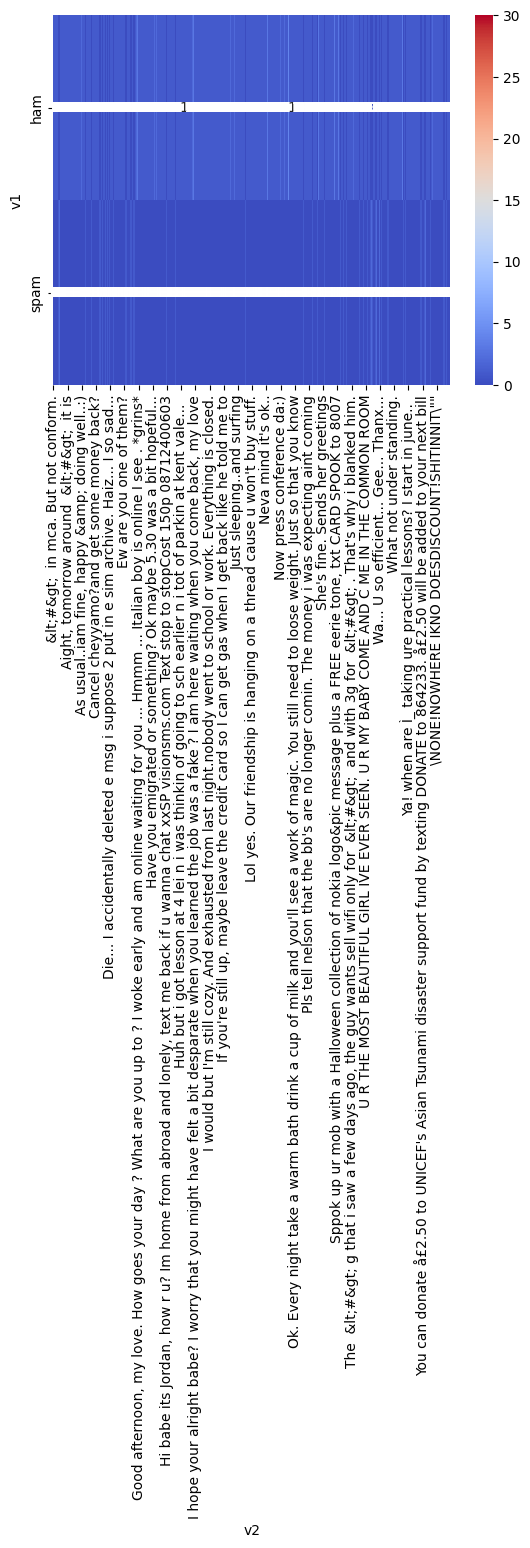

In [ ]:
sns.heatmap(contingency_table, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
def preprocess_text(text):
    # Remove HTML tags using regex
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Convert text to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a text string
    cleaned_text = ' '.join(words)

    return cleaned_text


In [ ]:
df['cleaned_text'] = df['v2'].apply(preprocess_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
word_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
def text_to_vector(text):
    words = text.split()
    word_vectors = []

    for word in words:
        if word in word_vectors:
            word_vectors.append(word_vectors[word])

    if not word_vectors:
        return None

    return sum(word_vectors) / len(word_vectors)

df['word_embeddings'] = df['cleaned_text'].apply(text_to_vector)

In [ ]:
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 6))  # Adjust n-gram range as needed
char_matrix = char_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['v1'], test_size=0.2, random_state=42)

# Create and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9659192825112107
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9426008968609866
Classification Report:
               precision    recall  f1-score   support

         ham       0.94      1.00      0.97       965
        spam       0.96      0.60      0.74       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115



In [ ]:
from sklearn.svm import SVC

# Create and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9757847533632287
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder

# Encode labels (spam or ham) into numerical values
le = LabelEncoder()
df['v1'] = le.fit_transform(df['v1'])

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])
X = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/5
70/70 [==============================] - 12s 142ms/step - loss: 0.2260 - accuracy: 0.9235
Epoch 2/5
70/70 [==============================] - 10s 141ms/step - loss: 0.0290 - accuracy: 0.9897
Epoch 3/5
70/70 [==============================] - 10s 144ms/step - loss: 0.0087 - accuracy: 0.9982
Epoch 4/5
70/70 [==============================] - 10s 143ms/step - loss: 0.0034 - accuracy: 0.9989
Epoch 5/5
35/35 [==============================] - 2s 37ms/step - loss: 0.0885 - accuracy: 0.9803
Loss: 0.08853164315223694
Accuracy: 0.9802690744400024


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['v1'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Create and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Vectorize the testing data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Make predictions on the testing data
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

